In [1]:
# Importing neccesary libraries to run models
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
from IPython import get_ipython
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from scipy.stats import randint
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Uploading dataset to terminal
data = pd.read_csv('updated_Co2dataset.csv')

In [3]:
# Viewing first 5 dataset rows
# Label 1 = Normal Co2 level 
# Lable 0 = Not normal Co2 Level
data.head()

,label,co2(ppm),methane(ppb),nitrous_oxide(ppvb),primary_energy_consumption (trillion BTUs),population,Co2 level
0,1,260.3,897,325,31.746,12412311,Normal
1,1,242.7,907,329,13.903,13299016,Normal
2,0,137.9,899,320,9.168,14485543,Not Normal
3,0,133.3,889,320,9.105,15816601,Not Normal
4,0,128.2,896,299,8.816,17075728,Not Normal


In [4]:
# Removing column "Co2 level" as it is not neccessary, it is being represented by the label
# ML models works best with digits more than strings
data = data.drop(['Co2 level', 'label'], axis=1)

In [5]:
# Viewing updated dataset
data.head()

,co2(ppm),methane(ppb),nitrous_oxide(ppvb),primary_energy_consumption (trillion BTUs),population
0,260.3,897,325,31.746,12412311
1,242.7,907,329,13.903,13299016
2,137.9,899,320,9.168,14485543
3,133.3,889,320,9.105,15816601
4,128.2,896,299,8.816,17075728


In [6]:
# Viewing last 5 rows of the dataset
# Dataset consistes of 10,000 data
data.tail()

,co2(ppm),methane(ppb),nitrous_oxide(ppvb),primary_energy_consumption (trillion BTUs),population
9996,263.5,2728,2490,5435.2,23531567
9997,310.7,2379,2062,6131.7,24187500
9998,298.1,2610,2243,6590.7,24862673
9999,294.5,333,205,2438.9,4510197
10000,320.8,345,214,3083.2,4622757


In [7]:
# Data has 10,001 rows (including row description cells) and 6 colunms
data.shape

(10001, 5)

In [8]:
# Dataset colunms which containes the traget (label), and 5 diffrent features to be used to train the model
data.columns

Index(['co2(ppm)', 'methane(ppb)', 'nitrous_oxide(ppvb)',
       'primary_energy_consumption (trillion BTUs)', 'population'],
      dtype='object')

In [9]:
# Checking for null values in the dataset
data.isnull().sum()

co2(ppm)                                      0
methane(ppb)                                  0
nitrous_oxide(ppvb)                           0
primary_energy_consumption (trillion BTUs)    0
population                                    0
dtype: int64

In [10]:
# Checking dataset information to ensure consistency
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 5 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   co2(ppm)                                    10001 non-null  float64
 1   methane(ppb)                                10001 non-null  int64  
 2   nitrous_oxide(ppvb)                         10001 non-null  int64  
 3   primary_energy_consumption (trillion BTUs)  10001 non-null  float64
 4   population                                  10001 non-null  int64  
dtypes: float64(2), int64(3)
memory usage: 390.8 KB


In [11]:
# Further decribing the dataset
# Showing the mean, standard deviation, min, 25 percentile, 50 percentile, 70 percentile and the maximum value
data.describe()

,co2(ppm),methane(ppb),nitrous_oxide(ppvb),primary_energy_consumption (trillion BTUs),population
count,1.000100e+04,10001.000000,10001.000000,1.000100e+04,1.000100e+04
mean,1.332352e+04,3820.612639,1592.733827,3.804720e+04,4.019929e+07
std,6.489879e+04,11511.755536,4786.036637,1.928026e+05,1.621540e+08
min,2.200000e+00,0.000000,0.000000,0.000000e+00,1.750500e+04
25%,1.357000e+02,207.000000,56.000000,1.189000e+02,1.643333e+06
50%,7.726000e+02,826.000000,349.000000,1.618265e+03,6.362039e+06
75%,5.507600e+03,2253.000000,1046.000000,8.899400e+03,1.933110e+07
max,1.028999e+06,124243.000000,54729.000000,3.821572e+06,1.427648e+09


In [12]:
# Assigning datset colunms into feature and target variables
X = data.drop('co2(ppm)',axis=1)
y = data['co2(ppm)']

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
# Assuming X contains features and y contains CO2 values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features (optional but can be beneficial for SVM)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# SVM_REGRESSION MODEL

In [69]:
svr_model = SVR(kernel='linear')  # different kernels tried; sigmoid, linear, poly, rbf. With poly the most accurate
svr_model.fit(X_train, y_train)

SVR(kernel='linear')

In [70]:
y_pred = svr_model.predict(X_test)

In [71]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'R2 Score: {r2}')

MAE: 12669.814772975205
MSE: 4599292792.603259
R2 Score: 0.13763593664950036


# Testing the model with features as input

In [72]:
specific_inputs = [[4878,716,43.26,31161378]]  # Provide specific values for your features
specific_inputs = scaler.transform(specific_inputs)  # Scale the inputs if you standardized the data

co2_prediction = svr_model.predict(specific_inputs)
print(f'Predicted CO2 Value: {co2_prediction[0]}')

Predicted CO2 Value: 1717.5502248867142


# Scatter Plot showing the relationship between the actual CO2 Emissions Vs. Predicted CO2 Emissions

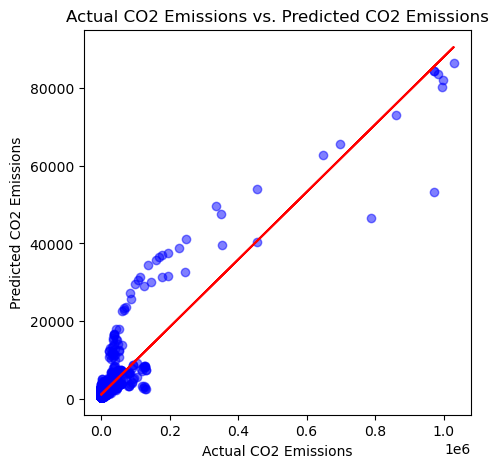

In [73]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming y_test contains actual CO2 emissions and y_pred contains predicted CO2 emissions
# Replace with your actual variable names if different
plt.figure(figsize=(5, 5))

# Scatter plot
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.title('Actual CO2 Emissions vs. Predicted CO2 Emissions')
plt.xlabel('Actual CO2 Emissions')
plt.ylabel('Predicted CO2 Emissions')

# Add a trendline
z = np.polyfit(y_test, y_pred, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='red')

plt.show()

In [74]:
new_data = pd.read_csv('Test_data.csv')

In [75]:
specific_inputsnew = scaler.transform(new_data)

In [76]:
predictions = svr_model.predict(specific_inputsnew)

In [77]:
print(predictions)

[ 742.08425015  753.08708301  759.43993956 ... 1862.25071503  554.91522877
  566.73343992]


In [78]:
import pandas as pd

# Assuming 'predictions' is a list or array containing your predictions
# Create a DataFrame with the predictions
predictions_df = pd.DataFrame(predictions, columns=['Predicted_CO2'])

# Assuming 'new_data' is your original dataset (or a DataFrame with the same structure)
# Concatenate the original data with the predictions
result_df = pd.concat([new_data, predictions_df], axis=1)

# Save the result to a CSV file
result_df.to_csv('predicted_CO2_values.csv', index=False)